<h1>2014-2024 - Top 10 holdings of BGF World Technology A2</h1>
<h2>Stock Correlations and Retun Analysis with Equal Share Investment</h2>

<h3>Taking the top 10 holdings of the BFG World Technology A2 Fund as a study case, we seek to analyze historic stock prices from 1900 to 2020 to answer the following questions:</h3>
<ul>
  <li>What is the correlation between the top 10 stocks in this fund? can we consider investing in these stocks as low-risk in term of correlation?</li>
  <li>If we decided to invest in these stocks at the beginning of the year 2010, how much are the total commulative return after 10 years in 2020?</li>
</ul>  

<h4>What is the correlation between the top 10 stocks in this fund? can we consider investing in these stocks as low-risk in term of correlation?</h4>

<p>We start by importing the needed packages for this notebook</p>

In [39]:
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

<p>We then declare the top 10 stock holdings in this fund along with their share weight in this stock</p>
<p>Since the fund manager blackrock does only annonce the top 10 holdings in these stocks among around 75 other stocks in this fund, we assume that there is only these 10 stocks in the fund</p>
<p>You can see more information about this fund by visiting <strong><a href="https://blackrock.com/no/intermediaries/products/230010/blackrock-world-technology-a2-usd-fund">BGF World Technology Fund</a></strong></p>

In [40]:
fund = {
    "NVDA": 0.1,
    "MSFT": 0.1,
    "AAPL": 0.1,
    "AVGO": 0.1,
    "CDNS": 0.1,
    "META": 0.1,
    "AMD": 0.1,
    "ASML.AS": 0.1,
    "AMZN": 0.1,
    "MA": 0.1,
}
stocks = list(fund.keys())
stock_weights = list(fund.values())
start_day = "1980-01-01"
end_day = "2021-01-01"

print("Targeted stocks: ", stocks)
print("Stock Weights: ", stock_weights)
print(f"Analysis from {start_day} to {end_day}")

Targeted stocks:  ['NVDA', 'MSFT', 'AAPL', 'AVGO', 'CDNS', 'META', 'AMD', 'ASML.AS', 'AMZN', 'MA']
Stock Weights:  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Analysis from 1980-01-01 to 2021-01-01


In [41]:
data = yf.download(" ".join(stocks), start=start_day, end=end_day)

[*********************100%%**********************]  10 of 10 completed


In [61]:
# The daily close price of each stock.
close_prices = data['Close']

# The daily percentage change in each stock.
percentage_change = close_prices.pct_change(fill_method=None)

# The daily cumulative_returns from each stock.
cumulative_returns = (percentage_change +1).cumprod()

# Total daily total cumulative returns of all stocks.
total_returns = (percentage_change * stock_weights).sum(axis = 1)
total_cumulative_returns = (total_returns + 1).cumprod() 

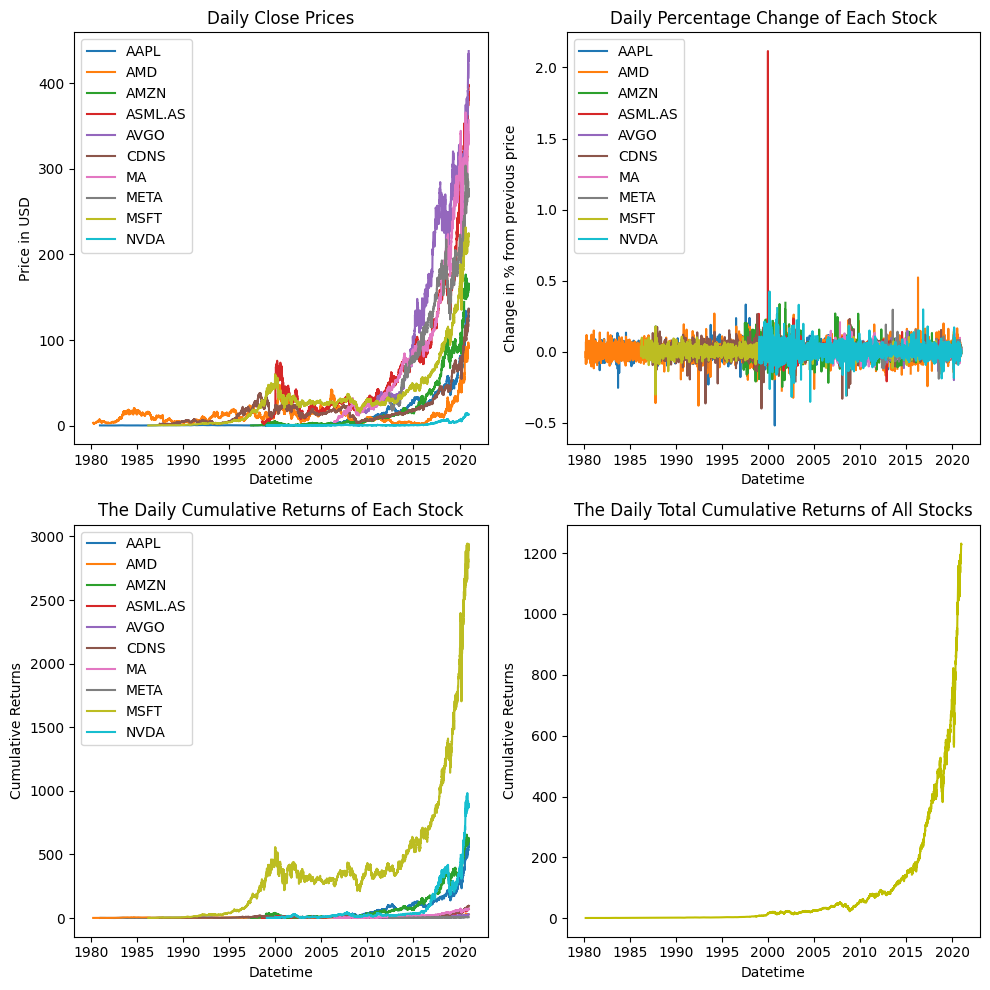

In [77]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# First subplot
axs[0, 0].plot(close_prices, label=close_prices.columns)
axs[0, 0].set_title('Daily Close Prices')
axs[0, 0].set_xlabel('Datetime')
axs[0, 0].set_ylabel('Price in USD')
axs[0, 0].legend(loc='upper left')

# Second subplot
axs[0, 1].plot(percentage_change, label=percentage_change.columns)
axs[0, 1].set_title('Daily Percentage Change of Each Stock')
axs[0, 1].set_xlabel('Datetime')
axs[0, 1].set_ylabel('Change in % from previous price')
axs[0, 1].legend(loc='upper left')

# Third subplot
axs[1, 0].plot(cumulative_returns, label=cumulative_returns.columns)
axs[1, 0].set_title('The Daily Cumulative Returns of Each Stock')
axs[1, 0].set_xlabel('Datetime')
axs[1, 0].set_ylabel('Cumulative Returns')
axs[1, 0].legend(loc='upper left')

# Fourth subplot
axs[1, 1].plot(total_cumulative_returns, 'y')
axs[1, 1].set_title('The Daily Total Cumulative Returns of All Stocks')
axs[1, 1].set_xlabel('Datetime')
axs[1, 1].set_ylabel('Cumulative Returns')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
initial_investment_amount = 100 # dollars
number_of_stocks_in_fund = len(fund)

start = datetime.strptime(start_day, "%Y-%m-%d")
end = datetime.strptime(end_day, "%Y-%m-%d")

investment_period_in_years = round((end - start).days / 365.25)
last_day_of_investment = (end + timedelta(days=-1)).strftime("%Y-%m-%d")
actual_returns = cumulative_returns.loc[last_day_of_investment]
equal_share = initial_investment_amount / number_of_stocks_in_fund

today_value = 0
for v in actual_returns.values:
    today_value += equal_share*v

today_value = round(today_value)

print(f"An investment of {initial_investment_amount} $ at {start_day} equally distributed across these {number_of_stocks_in_fund} stocks is worth on {end_day}: ", 
      today_value)

print(f"An initial investment of {initial_investment_amount} yields a return of {(today_value/initial_investment_amount)*100}% in 10 years period")

An investment of 100 $ at 2010-01-01 equally distributed across these 10 stocks is worth on 2020-01-01:  939
An initial investment of 100 yields a return of 939.0% in 10 years period


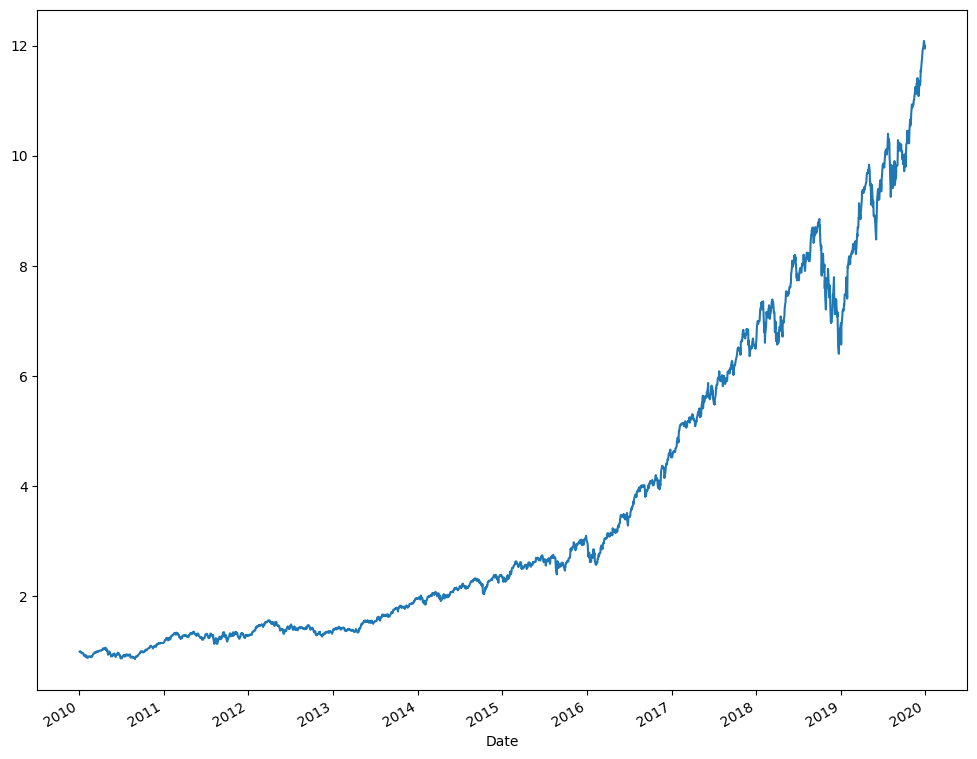

In [10]:
# Total cumulative returns for our portfolio
total_returns = (percentage_change * stock_weights).sum(axis = 1)
total_cumulative_returns = (total_returns + 1).cumprod() 

total_cumulative_returns.plot(figsize=(12, 10))
plt.show()

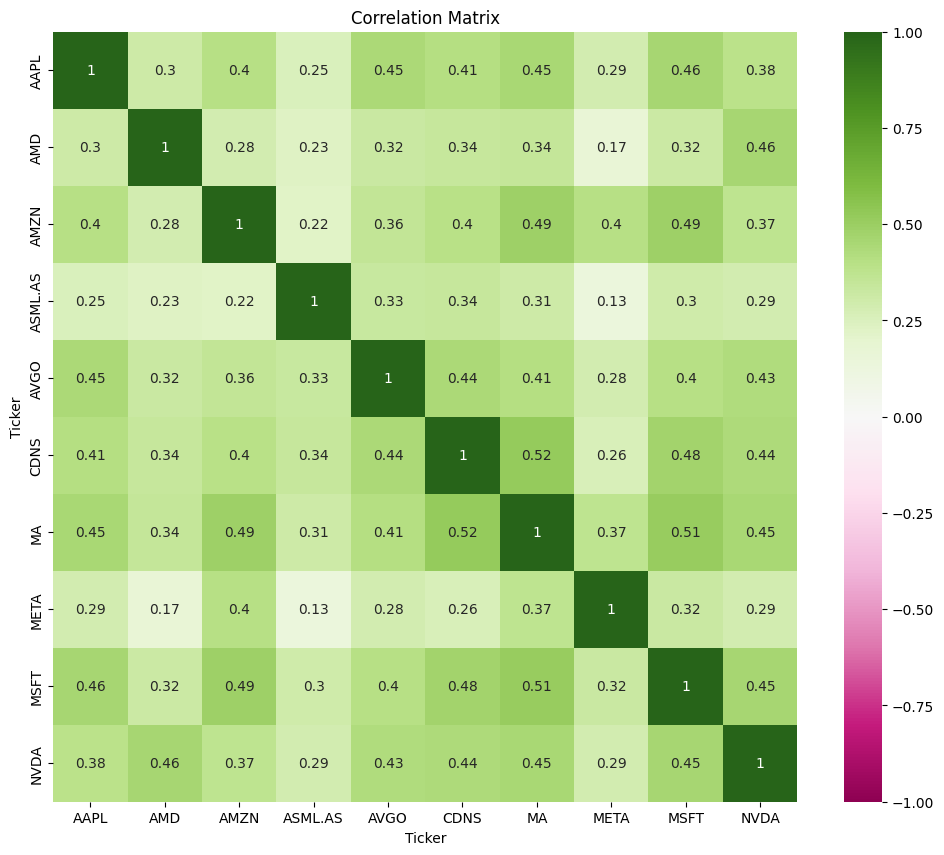

In [11]:
# Invastigating correlation between stocks
correlation = percentage_change.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The maximum sharpe ratio:  1.4055293691262603
The stocks:  ['NVDA', 'MSFT', 'AAPL', 'AVGO', 'CDNS', 'META', 'AMD', 'ASML.AS', 'AMZN', 'MA']
The optimal stock weights that gives the maximum sharpe ratio:  [0.11238201 0.00122511 0.11626074 0.19373514 0.14003999 0.1441646
 0.13970089 0.12487391 0.01264919 0.01496842]


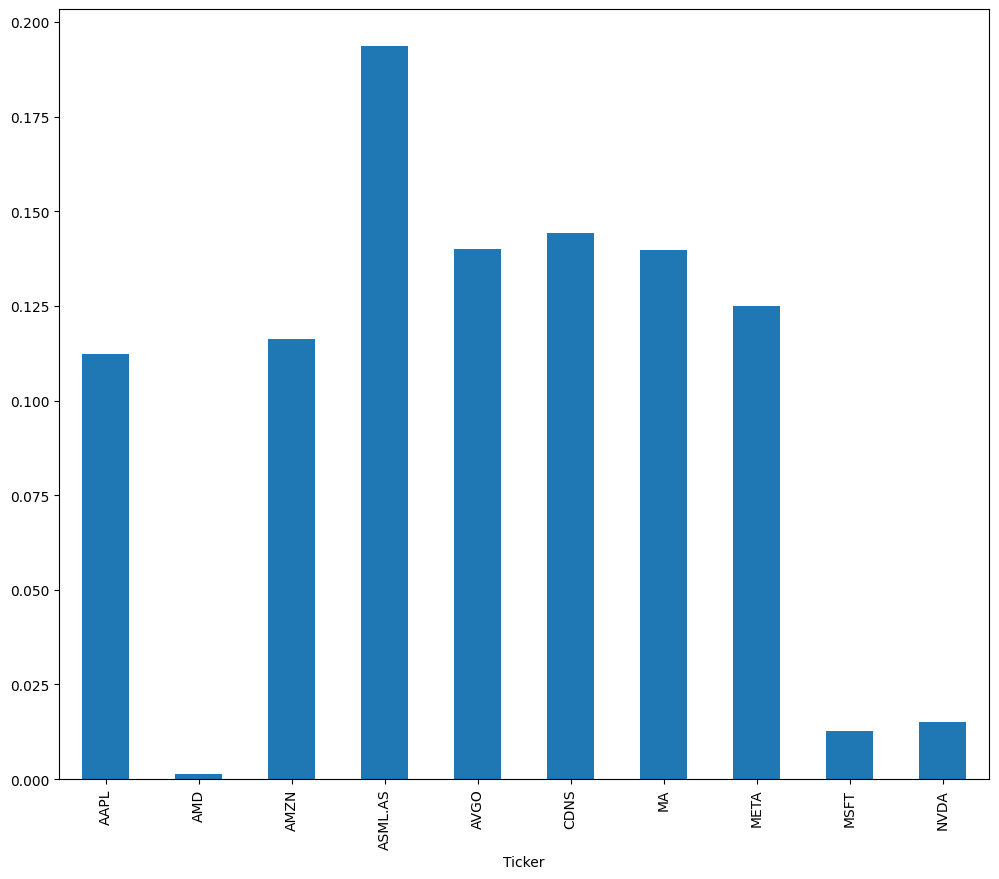

In [12]:
# Optimizing the stocks weights of this portfolio
p_weights, p_returns, p_risk, p_sharpe = [], [], [], []

count = 500000
for k in range(0, count):
   wts = np.random.uniform(size = len(percentage_change.columns))
   wts = wts/np.sum(wts)
   p_weights.append(wts)

   #returns
   mean_ret = (percentage_change.mean() * wts).sum()*252
   p_returns.append(mean_ret)

   #volatility
   ret = (percentage_change * wts).sum(axis = 1)
   annual_std = np.std(ret) * np.sqrt(252)
   p_risk.append(annual_std)
    
   #Sharpe ratio
   sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
   p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

# Max Sharpe ratio
print("The maximum sharpe ratio: ", p_sharpe[max_ind])

# Stocks
print("The stocks: ", fund)

# Stock Weights
print("The optimal stock weights that gives the maximum sharpe ratio: ", p_weights[max_ind])

s = pd.Series(p_weights[max_ind], index=percentage_change.columns)

s.plot(kind='bar', figsize=(12, 10))

plt.show()